In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('DATA/spam.csv',encoding='ISO-8859-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<AxesSubplot:>

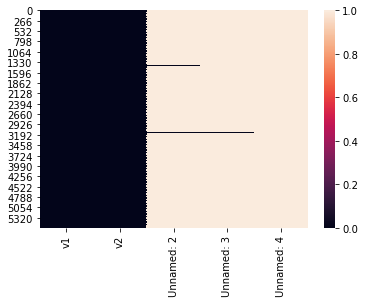

In [11]:
sns.heatmap(df.isnull())

# Drop unnecessary column

In [17]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [18]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
## Rename the columns
df.columns = ['labels','data']

In [22]:
df

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
# Create binary labels
df['b_labels'] = df['labels'].map({'ham':0 , 'spam':1})


In [37]:
df

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [39]:
Y = df['b_labels'].values

In [40]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

#### The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [43]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

## Splitting the data

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [49]:
## Create moddel to train it and print scores
model  = MultinomialNB()
#fit the model
model.fit(X_train,y_train)

print("train score",model.score(X_train,y_train))
print("test score", model.score(X_test,y_test))

train score 0.993838735601393
test score 0.9820554649265906


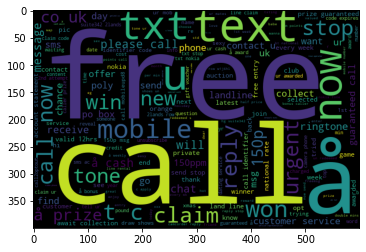

In [68]:
## Visualising the label

def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
        
    wordcloud = WordCloud(width=600,height=400).generate(words)
    
    plt.imshow(wordcloud)
    plt.axis='off'
    plt.show()
    
visualize('spam')

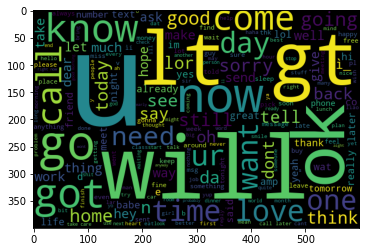

In [69]:
visualize('ham')

## See what we are getting wrong

In [70]:
df['predictions'] = model.predict(X)

In [74]:
## Things that should be spam

sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP51FL
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
TheMob>Yo yo yo-Here comes a new selection of hot downloads for o

In [75]:
# Things that are not actually spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']

for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
Total video converter free download type this in google search:)
Ambrith..madurai..met u in arun dha marrge..remembr?
\Si.como no?!listened2the plaid album-quite gd&the new air1 which is hilarious-also boughtåÓbraindanceåÓa comp.ofstuff on aphexåÕs ;abel
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
I know complain num only..bettr directly go to bsnl offc nd apply for it..
Ultimately tor motive t

In [ ]:
!git add Spam_Detector.ipynb
! git commit -m "19:04/25-07-21"
! git push origin main